# Data Familiarisation

In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
file_path = "E:\\Projects\\NLP\\SMS Spam\\Data.csv"

In [7]:
# latin-1 was used because pandas was unable to interpret few bytes from the csv file. Other embedding option could be used as well.
beg_df = pd.read_csv(file_path, encoding='latin-1')
beg_df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [8]:
beg_df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1,inplace=True)  #  Removing the columns that are not useful
beg_df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Dealing with missing and duplicate values.

In [9]:
beg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
beg_df['v2'] = beg_df['v2'].astype('string')    # Changing the datatype of column to make it more suitable for further processing
beg_df.duplicated().value_counts()

False    5169
True      403
Name: count, dtype: int64

In [11]:
beg_df.dtypes

v1            object
v2    string[python]
dtype: object

In [12]:
beg_df=beg_df.drop_duplicates()
beg_df.shape

(5169, 2)

# Label encoding the target column

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
beg_df['v1']=encoder.fit_transform(beg_df['v1'])        # Encoding the columns 

C:\Users\sweta\AppData\Local\Temp\ipykernel_28180\2224767019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beg_df['v1']=encoder.fit_transform(beg_df['v1'])        # Encoding the columns


In [14]:
beg_df

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [15]:
encoder.classes_

array(['ham', 'spam'], dtype=object)

In [16]:
pipe_df=beg_df.copy()

# Doing preprocessing on input text to make it ready for the model.

In [17]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [25]:
nltk.download('stopwords')      
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sweta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sweta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sweta\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [26]:
def preprocessing_text(text):

  # Removing punctuations
  translator = str.maketrans('', '', string.punctuation)
  text=str(text).translate(translator)

  # Removing special characters
  text=re.sub(r'[^a-zA-Z0-9\s]', '', text)

  # Converting text to lower case
  text=text.lower()

  # Tokenize sentences to words
  words = []
  words=word_tokenize(text)

  # Removing stop words
  stop_words = set(stopwords.words('english'))
  words = [word for word in words if word not in stop_words]

  # Stemming of the words
  stemmer=PorterStemmer()
  fin_list=[]
  for word in words:
    fin_list.append(stemmer.stem(word))

  return fin_list

In [27]:
beg_df.dtypes

v1             int32
v2    string[python]
dtype: object

In [28]:
beg_df['v2']=beg_df['v2'].apply(preprocessing_text)

C:\Users\sweta\AppData\Local\Temp\ipykernel_28180\2244431747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beg_df['v2']=beg_df['v2'].apply(preprocessing_text)


In [29]:
beg_df

,v1,v2
0,0,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,"[ok, lar, joke, wif, u, oni]"
2,1,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"[nah, dont, think, goe, usf, live, around, tho..."
...,...,...
5567,1,"[2nd, time, tri, 2, contact, u, u, 750, pound,..."
5568,0,"[b, go, esplanad, fr, home]"
5569,0,"[piti, mood, soani, suggest]"
5570,0,"[guy, bitch, act, like, id, interest, buy, som..."


# Transforming & Visualising Training Data

In [30]:
def join_words(token_list):
    return ' '.join(token_list)
beg_df['sentences'] = beg_df['v2'].apply(join_words)

beg_df

C:\Users\sweta\AppData\Local\Temp\ipykernel_28180\2676457337.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beg_df['sentences'] = beg_df['v2'].apply(join_words)


,v1,v2,sentences
0,0,"[go, jurong, point, crazi, avail, bugi, n, gre...",go jurong point crazi avail bugi n great world...
1,0,"[ok, lar, joke, wif, u, oni]",ok lar joke wif u oni
2,1,"[free, entri, 2, wkli, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkt 21...
3,0,"[u, dun, say, earli, hor, u, c, alreadi, say]",u dun say earli hor u c alreadi say
4,0,"[nah, dont, think, goe, usf, live, around, tho...",nah dont think goe usf live around though
...,...,...,...
5567,1,"[2nd, time, tri, 2, contact, u, u, 750, pound,...",2nd time tri 2 contact u u 750 pound prize 2 c...
5568,0,"[b, go, esplanad, fr, home]",b go esplanad fr home
5569,0,"[piti, mood, soani, suggest]",piti mood soani suggest
5570,0,"[guy, bitch, act, like, id, interest, buy, som...",guy bitch act like id interest buy someth els ...


In [32]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500)

In [33]:
spam_wc = wc.generate(beg_df[beg_df['v1'] == 1]['sentences'].str.cat(sep=" "))

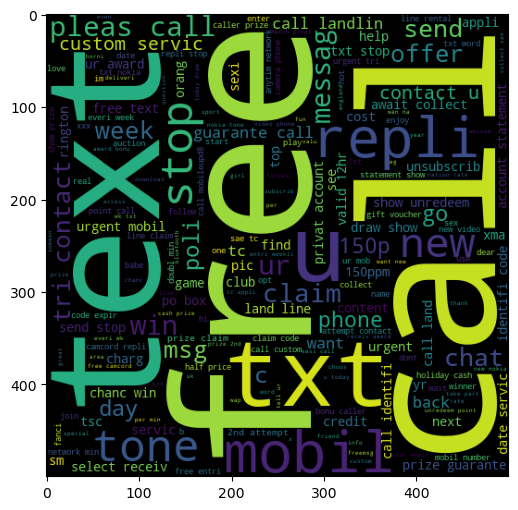

In [34]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)             # Visualising using word cloud. The larger the size of words, more is the frequency of occurrence of the word.

In [ ]:
spam_corpus = []
for msg in beg_df[beg_df['v1'] == 1]['sentences'].tolist():
    for word in msg.split():
        spam_corpus.append(word)           # Creating a word corpus for spam sentence words

In [36]:
len(spam_corpus)

10813

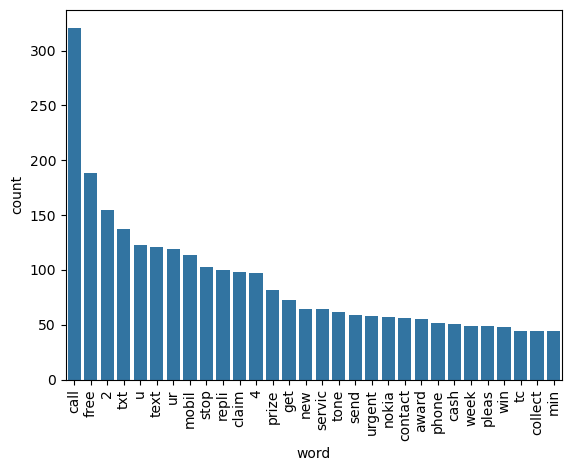

In [37]:
from collections import Counter
common_words = Counter(spam_corpus).most_common(30)
df_common_words = pd.DataFrame(common_words, columns=['word', 'count'])
sns.barplot(x='word', y='count', data=df_common_words)
plt.xticks(rotation='vertical')
plt.show()

# Model Training

In [38]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [39]:
X = tfidf.fit_transform(beg_df['sentences']).toarray()

In [40]:
y = beg_df['v1'].values

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [46]:
# Using the three Naive Bayes model to predict for spam or non-spam
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [49]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(f'Accuracy Score for GNB: {accuracy_score(y_test,y_pred1)}')
print("Confusion Matrix for GNB:")
print(confusion_matrix(y_test,y_pred1))
print(f'Precision Score for GNB:{precision_score(y_test,y_pred1)}')

Accuracy Score for GNB: 0.874274661508704
Confusion Matrix for GNB:
[[786 110]
 [ 20 118]]
Precision Score for GNB:0.5175438596491229


In [51]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(f'Accuracy Score for MNB: {accuracy_score(y_test,y_pred2)}')
print("Confusion Matrix for MNB:")
print(confusion_matrix(y_test,y_pred2))
print(f'Precision Score for MNB:{precision_score(y_test,y_pred2)}')

Accuracy Score for MNB: 0.97678916827853
Confusion Matrix for MNB:
[[896   0]
 [ 24 114]]
Precision Score for MNB:1.0


In [52]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(f'Accuracy Score for BNB: {accuracy_score(y_test,y_pred3)}')
print("Confusion Matrix for BNB:")
print(confusion_matrix(y_test,y_pred3))
print(f'Precision Score for BNB:{precision_score(y_test,y_pred3)}')

Accuracy Score for BNB: 0.9825918762088974
Confusion Matrix for BNB:
[[895   1]
 [ 17 121]]
Precision Score for BNB:0.9918032786885246


# Precision score matters most in this case and so we choose Multinomial Naive Bayes.